In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

# Loading the data 

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\Python\Datasets\Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


# Column Description

* step: Unit of time in real world.
* type: CASH-IN, CASH-OUT,DEBIT,PAYMENT, TRANSFER.
* amount: amount of transaction in local currency.
* nameOrig: customer who started the transaction.
* oldbalanceOrg: initial balance before transaction.
* newbalanceOrg: new balance after the transaction.
* nameDest: new balance after transaction.
* oldbalanceDest: initial balance recipient before the transaction.  Note that there is not information for customers that start with M.
* newbalanceDest: new balance recipient before the transaction.
* isFraud: This is the transactions made by the fraudulent agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account.
* isFlaggedFraud: The bussiness model aims to control massive transfers from one account to another and flags illegal attempts.

# Exploratory Data Analysis

### Column Dimensions

In [3]:
data.shape

(1048575, 11)

### Data Type and Structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


## Descriptive Statistics

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


### Checking  NA

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

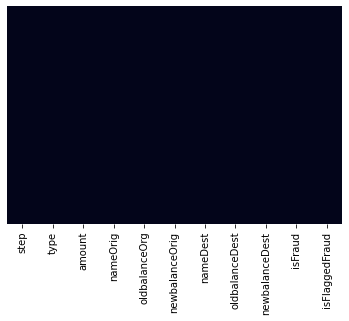

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### Check correlation

In [8]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

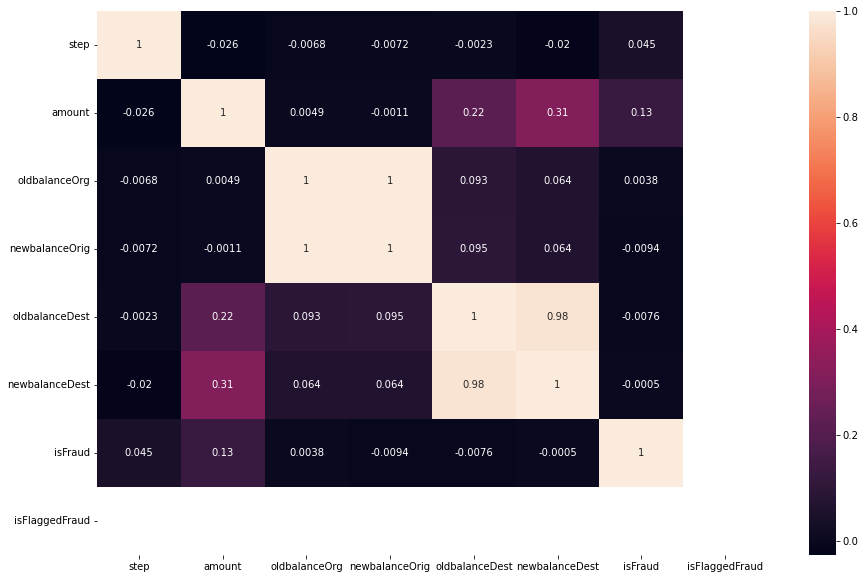

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

heatmap shows the information about the how the data is correlated, where intencity of color shows the correlation, such as the light color shows the strong correlation and the dark color shows the less correlation.

## Check Duplicate values

In [10]:
data.duplicated().sum()

0

There is not null values and duplicate values available in dataset.

### Check unique values and value count of each observations

In [11]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

## Graphical Representation

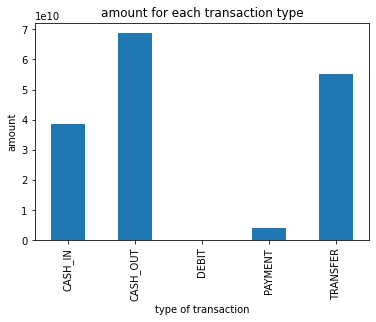

In [13]:
typ=data.groupby('type').amount.sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
typ.plot(kind='bar')
ax.set_title('amount for each transaction type')
ax.set_xlabel('type of transaction')
ax.set_ylabel('amount');

In [14]:
data['isFraud'].unique()

array([0, 1], dtype=int64)

In [15]:
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

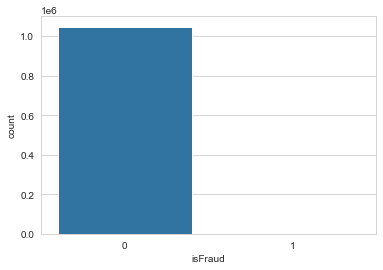

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='isFraud',data=data)

In [17]:
data['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [18]:
data['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

### Check maximum and minimum values

In [19]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].min()

amount            0.1
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [20]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].max()

amount            10000000.0
oldbalanceOrg     38900000.0
newbalanceOrig    38900000.0
oldbalanceDest    42100000.0
newbalanceDest    42200000.0
dtype: float64

C:\Users\Lenovo\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

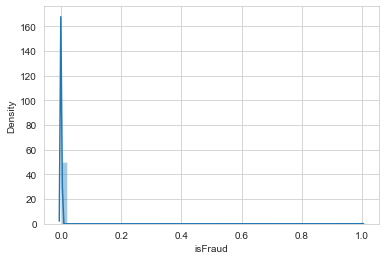

In [21]:
sns.distplot(a=data.isFraud)

In [22]:
data.isFraud.sum()

1142

In [23]:
data.isFlaggedFraud.sum()

0

This shows there are 1142 fraud cases but no any fraud transaction is marked as fraud.

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

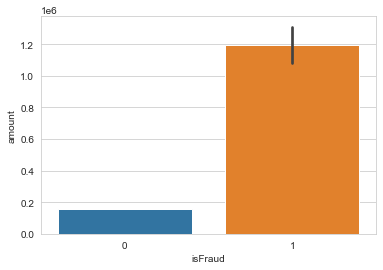

In [24]:
sns.barplot(x='isFraud',y='amount',data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

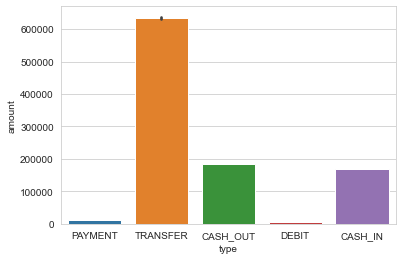

In [25]:
sns.barplot(x='type',y='amount',data=data)

# Data Cleaning

In [26]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
l=LabelEncoder()
data['type']=l.fit_transform(data['type'])

In [29]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [30]:
data['type'].unique()

array([3, 4, 1, 2, 0])

# Data Spliting

In [31]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# train, test, split

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [33]:
x_train

array([[3.30000000e+01, 0.00000000e+00, 5.04619850e+05, ...,
        5.54391850e+05, 5.40610900e+04, 0.00000000e+00],
       [3.50000000e+01, 3.00000000e+00, 7.78360000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+01, 4.00000000e+00, 8.95927800e+05, ...,
        0.00000000e+00, 9.33467290e+05, 1.64528821e+06],
       ...,
       [4.00000000e+01, 1.00000000e+00, 1.01726970e+05, ...,
        0.00000000e+00, 4.86421990e+05, 5.88148960e+05],
       [4.10000000e+01, 3.00000000e+00, 5.79318000e+03, ...,
        3.42698320e+05, 0.00000000e+00, 0.00000000e+00],
       [1.80000000e+01, 4.00000000e+00, 2.30609960e+05, ...,
        1.85564090e+05, 5.28802220e+05, 7.59412180e+05]])

In [34]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Machine Learning Modeling

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [36]:
logpred=log.predict(x_test)
logpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import balanced_accuracy_score, classification_report,precision_score,accuracy_score
from sklearn.metrics import recall_score, f1_score

In [38]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314221
           1       0.57      0.31      0.40       352

    accuracy                           1.00    314573
   macro avg       0.78      0.65      0.70    314573
weighted avg       1.00      1.00      1.00    314573



In [39]:
ac_score=accuracy_score(y_test,logpred)*100
print('accuracy_score of logsitic regression: ',ac_score)

accuracy_score of logsitic regression:  99.89636745683832


This accuracy score may be result of overfitting problem with bias of no fraud transaction

# Feature engineering

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
s=SMOTE()

In [42]:
x_data,y_data=s.fit_resample(x,y)

# Feature Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_data1=mm.fit_transform(x_data)
x_data1

array([[0.00000000e+00, 7.50000000e-01, 9.83954010e-04, ...,
        4.12072905e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.50000000e-01, 1.86418002e-04, ...,
        4.98321851e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.80900002e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.39750895e-01, 1.00000000e+00, 2.45877814e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.59215837e-01, 1.00000000e+00, 3.18716676e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.35056932e-01, 2.50000000e-01, 1.31616408e-02, ...,
        0.00000000e+00, 1.67201761e-02, 1.97994293e-02]])

In [44]:
y_data1=y_data

In [45]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data1,y_data1,test_size=0.3,random_state=11)

## Logistic regression after scaling

In [46]:
logs=LogisticRegression()
logs.fit(x_train1,y_train1)

LogisticRegression()

In [47]:
logspred=logs.predict(x_test1)
logspred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
print(classification_report(y_test1,logspred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    314606
           1       0.95      0.81      0.87    313854

    accuracy                           0.88    628460
   macro avg       0.89      0.88      0.88    628460
weighted avg       0.89      0.88      0.88    628460



In [49]:
ac_score1=accuracy_score(y_test1,logspred)*100
print('accuracy_score of logsitic regression after scaling: ',ac_score1)

accuracy_score of logsitic regression after scaling:  88.13544219202495


C:\Users\Lenovo\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

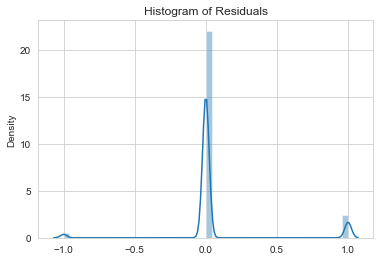

In [50]:
sns.distplot((y_test1-logspred))
plt.rcParams["figure.figsize"]=(10,6)
plt.title("Histogram of Residuals")

# Cross validation technique

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [52]:
skf=StratifiedKFold(n_splits=5,random_state=53,shuffle=True)
skf.get_n_splits(x_data1,y_data1)

5

In [53]:
cv_score=cross_val_score(logs,x_train1,y_train1,cv=skf)
cv_pred=cross_val_predict(logs,x_test1,y_test1)
print(cv_score*100)
print(cv_pred)

C:\Users\Lenovo\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[87.6620454  87.68416638 87.75201939 87.7076933  87.68689414]
[0 1 0 ... 0 1 1]


# KNearestNeighbors Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
knn_pred=knn.predict(x_test1)
knn_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
knn_acscore=accuracy_score(knn_pred,y_test1)*100
knn_acscore

99.47999872704708

In [56]:
print(classification_report(y_test1,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    314606
           1       0.99      1.00      0.99    313854

    accuracy                           0.99    628460
   macro avg       0.99      0.99      0.99    628460
weighted avg       0.99      0.99      0.99    628460



## KNN classifier with stratified KFold

In [57]:
skf1=StratifiedKFold(n_splits=5,random_state=51,shuffle=True)
skf1.get_n_splits(x_data1,y_data1)

5

In [58]:
cv_score1=cross_val_score(knn,x_train1,y_train1,cv=skf)
cv_pred1=cross_val_predict(knn,x_test1,y_test1)
print(cv_score1*100)
print(cv_pred1)

[99.40535048 99.39307354 99.41284979 99.42171501 99.37261534]
[0 1 0 ... 0 1 1]


# XGBoost Classifier

In [59]:
import xgboost as xgb

In [60]:
xgb=xgb.XGBClassifier()

In [61]:
xgb.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
xgb_pred=xgb.predict(x_test1)

In [63]:
xgb_acc=accuracy_score(y_test1,xgb_pred)*100
xgb_acc

99.98695223244121

In [64]:
print(classification_report(xgb_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314608
           1       1.00      1.00      1.00    313852

    accuracy                           1.00    628460
   macro avg       1.00      1.00      1.00    628460
weighted avg       1.00      1.00      1.00    628460



# Hyperparameter Fine Tuning

In [65]:
from sklearn.metrics import make_scorer

In [67]:
f1=make_scorer(f1_score)

In [66]:
params={
    'booster':['gbtree','gblinear','dart'],
    'eta':[0.3,0.1,0.01],
    'scale_pos_weight':[1,774,508,99]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(xgb,
               param_grid=params,
               scoring=f1,
               cv=StratifiedKFold(n_splits=5))
gs.fit(x_train,y_train)

In [ ]:
best_params=gs.best_params_
best_params

In [ ]:
best_params={'booster':'gbtree','eta':0.3,'scale_pos_weight':1}

In [ ]:
gs.best_score_

In [ ]:
xgb_gs=XGBClassifier(
     booster=best_params['booster'],
     eta=best_params['eta'],
     scale_pos_weight=best_params['scale_pos_weight']
)

In [ ]:
xgb_gs.fit(x_train,y_train)

In [ ]:
y_pred=xgb_gs.predict(x_train)